<a href="https://colab.research.google.com/github/dadalong666/2019-Python-Homework/blob/master/Q8_FunctionAPI_Claire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, concatenate, add, Input
from keras.optimizers import SGD, Adam
from matplotlib import pyplot as plt

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
x_train = train_x.reshape(60000, 784)
x_test = test_x.reshape(10000, 784)
x_train -= x_train.min()
x_train = x_train/x_train.max()
x_train.min(), x_train.max()

(0.0, 1.0)

In [0]:
from keras.utils import np_utils

In [0]:
train_y = np_utils.to_categorical(train_y, 10)
test_y = np_utils.to_categorical(test_y, 10)

[link text](https://drive.google.com/open?id=1A6nkTzeGLGW_gqjk81ETzo2yb0mSbP_L)




In [0]:
x = Input(shape=(784,))

In [0]:
#Hiden Layer 1
f01 = Dense(500, activation='sigmoid')

f11 = Dense(100, activation='sigmoid')
f12 = Dense(100, activation='sigmoid')
#f13 = Dense(100, activation='sigmoid')

f21 = Dense(50, activation='sigmoid')

f31 = Dense(50, activation='sigmoid')

f4 = Dense(10, activation='softmax')

In [9]:
h01 = f01(x)

h11 = f11(h01)
h12 = f12(h01)
#h13 = f13(h01)

h21 = f21(concatenate([h11,h12]))
h31 = f31(concatenate([h01,h21]))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
y = f4(h31)

In [11]:
model = Model(x,y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 100)          50100       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 100)          50100       dense_1[0][0]                    
__________________________________________________________________________________________________
concatenat

In [12]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.02),metrics=['accuracy'])
model_fit = model.fit(x_train, train_y, batch_size=200, epochs=10, verbose=2)
score = model.evaluate(x_train, train_y, batch_size=10000)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 4s - loss: 1.2178 - acc: 0.5144
Epoch 2/10
 - 1s - loss: 0.4442 - acc: 0.8501
Epoch 3/10
 - 1s - loss: 0.2795 - acc: 0.9353
Epoch 4/10
 - 1s - loss: 0.2312 - acc: 0.9473
Epoch 5/10
 - 1s - loss: 0.2009 - acc: 0.9536
Epoch 6/10
 - 1s - loss: 0.1994 - acc: 0.9542
Epoch 7/10
 - 1s - loss: 0.1851 - acc: 0.9581
Epoch 8/10
 - 1s - loss: 0.1733 - acc: 0.9605
Epoch 9/10
 - 1s - loss: 0.1677 - acc: 0.9622
Epoch 10/10
 - 1s - loss: 0.1716 - acc: 0.9609
60000/60000 [==============================] - 0s 6us/step
Loss: 0.182541
準確率: 95.993333


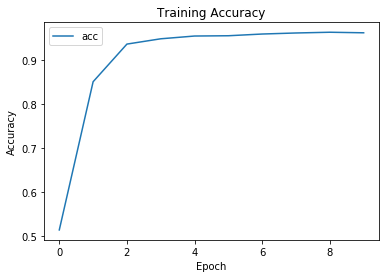

In [13]:
plt.plot(model_fit.history["acc"])

plt.title("Training Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["acc"], loc="best")
plt.show()

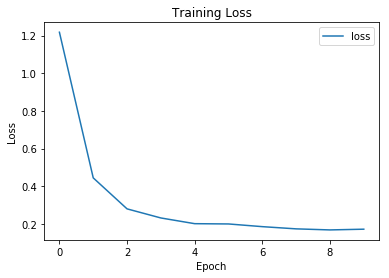

In [14]:
plt.plot(model_fit.history["loss"])

plt.title("Training Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss"], loc="best")
plt.show()